### To do 

gal['data'].shape = 3, npix, npix -> gal['img'], gal['mask'], gal['weight'].   'mask' needs to be boolean.

In [1]:
import matplotlib as mpl
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 
import pickle

import astrobf
from astrobf.utils import mask_utils
from astrobf.utils.mask_utils import *
from astrobf.utils import gen_mask
from astrobf.morph import measure_morph

from astrobf.run import Full_exp
from astrobf.analysis.binary_clustering import *
from astrobf.analysis.utils import *

#import statmorph
import time

from ax.utils.notebook.plotting import render, init_notebook_plotting

import random
import importlib

mpl.rcParams['savefig.facecolor'] = 'white'

### Prototype-related functions

In [6]:
class DataSet():
    
    def __init__(self, wdir="", sort=True):
        self.wdir = wdir
        self.all_imgs = None
        self.catalog = None
        self.morph_results = None
        self._gids = None
        self._sort_gids = sort
        
    def load_all_image(self, fn):
        self.all_imgs = pickle.load(open(fn, "rb"))
        if self._sort_gids:
            get_gid = lambda x : x['img_name']
            all_imgs.sort(key=get_gid)
            self.all_imgs = all_imgs
        self.add_gids()

    def add_gids(self):
        """
        will be used to keep different data in sync.
        """
        self._gids = np.array([gal['img_name'] for gal in self.all_imgs])
        
    def load_catalog(self, fn):
        """
        ensure the same order as self._gids
        """
        from astrobf.utils.misc import load_Nair
        self.catalog = load_Nair(fn)
        
    def 

SyntaxError: invalid syntax (<ipython-input-6-b2cefa1042f3>, line 32)

In [32]:
random.shuffle(all_gals)

In [38]:
sorted_ag = sort_list_by(all_gals, gids)
# NO, it's not what I wanted...! 

In [40]:
gids

array(['J000007.81m000226.09', 'J000047.89p141639.09',
       'J000133.95p150453.64', ..., 'J235743.74p003918.61',
       'J235744.10m001029.94', 'J235929.61p161009.65'],
      dtype='<U20')

In [39]:
sorted_ag

[{'data': array([[[ -1.15533574e-02,  -6.31309766e-03,  -1.32016102e-02, ...,
             5.46769518e-03,   6.54454867e-04,   1.24112507e-02],
          [  1.03013227e-02,   2.40179244e-02,  -5.30824112e-03, ...,
            -2.96255909e-02,  -3.20402384e-02,  -4.45312224e-02],
          [  3.63595672e-02,  -1.89688224e-02,  -4.44027148e-02, ...,
            -3.00558973e-02,  -9.67842340e-03,   2.35989057e-02],
          ..., 
          [  3.09830308e-02,  -2.81989276e-02,  -2.20685434e-02, ...,
             4.56394348e-03,   4.60721701e-02,   1.93773268e-03],
          [  3.22222188e-02,  -1.60888559e-03,  -2.12960690e-02, ...,
            -1.27161602e-02,   7.53149018e-02,   5.30695589e-03],
          [ -4.08626609e-02,  -3.81735060e-03,   4.81495038e-02, ...,
            -6.44972024e-04,   2.00089589e-02,  -9.87075455e-03]],
  
         [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  0.00000

In [25]:
gids = np.array([gal['img_name'] for gal in all_gals])

list 안의 값을 봐야돼서 좀 애매함.... 

In [37]:
# sort one or more lists by the list Y. 
def sort_list_by(lists, target, key_fun=lambda x : x):
    """
    parameters
    ----------
    lsits: list or lists 
    
    target:
        iterable with the same length as lists.
    """
    return [x for _, x in sorted(zip(target, lists), key=lambda pair: pair[0])]


In [26]:
gids

array(['J000007.81m000226.09', 'J000047.89p141639.09',
       'J000133.95p150453.64', ..., 'J235743.74p003918.61',
       'J235744.10m001029.94', 'J235929.61p161009.65'],
      dtype='<U20')

### 1. Load the all-in-one data

In [2]:
fn = "../../bf_data/Nair_and_Abraham_2010/all_gals.pickle"
all_gals = pickle.load(open(fn, "rb"))

all_gals = all_gals[1:] # Why the first galaxy image is NaN?

### Issue: TMO is dependent on the absolute value of a image 

Use fraction rather than absolute value??  
Or, set a *global* constraint? (maybe it makes sense bc values in all images are consistent in physical meaning)

### 2. Load galaxy catalog data and initial morph measurements

Just in case, only for the initial morphology measurement, full results are saved. 

In [3]:
from astrobf.utils.misc import load_Nair
cat = load_Nair('../../bf_data/Nair_and_Abraham_2010/catalog/table2.dat')

good_gids = np.array([gal['img_name'] for gal in all_gals])
inds = cat['ID'].searchsorted(good_gids)
cat = cat[inds]

### 1. align Catalog to all_gals

### 2. Modify cat to have size information 

Or, just use 'area'

### All_gals data

all-gals is a list of dictionaries, each of which contains 
(ndarray image, string image_name, and slices slice)


In [9]:
if False:
    all_morphs = glob("../../bf_data/Nair_and_Abraham_2010/BriAda/Morphs/*.pickle")

    good_gids = np.array([gal['img_name'] for gal in all_gals])
    result_arr = measure_morph.load_initial_morph(all_morphs, good_gids)
    # Pickle result_arr
    pickle.dump(result_arr, open("../../bf_data/Nair_and_Abraham_2010/morph_init_result.pickle", "wb"))
else:
    result_arr = pickle.load(open("../../bf_data/Nair_and_Abraham_2010/morph_init_result.pickle", "rb"))

result_arr = custom_morph.init_simple_morph(all_gals, params)
print(len(result_arr))

9537


# Initialize BO loop -  Measure morphology features

### Initial guesses 


In [4]:
fields = ['gini', 'm20']#, 'concentration', 'asymmetry', 'smoothness']

# Run Bayesian Optimization loop

In [5]:
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.ax_client import AxClient
#from ax.utils.notebook.plotting import render, init_notebook_plotting
#init_notebook_plotting()

### define evaluation function
1. Measure Morphological parameters 
2. cluster/classify 
3. assess clustering/classification

In [20]:
import importlib

In [21]:
importlib.reload(Full_exp)

<module 'astrobf.run.Full_exp' from '/home/hoseung/Work/tonemap/astroBF/astrobf/run/Full_exp.py'>

### Clustering performance metric

cluster member의 T type의 Homogeniety를 고려하는 metric이 필요함. 
Scikit-learn의 clutering metric을 테스트해 본 결과 경향은 대동소이하며, Silhouette_score만 가끔씩 튐. 

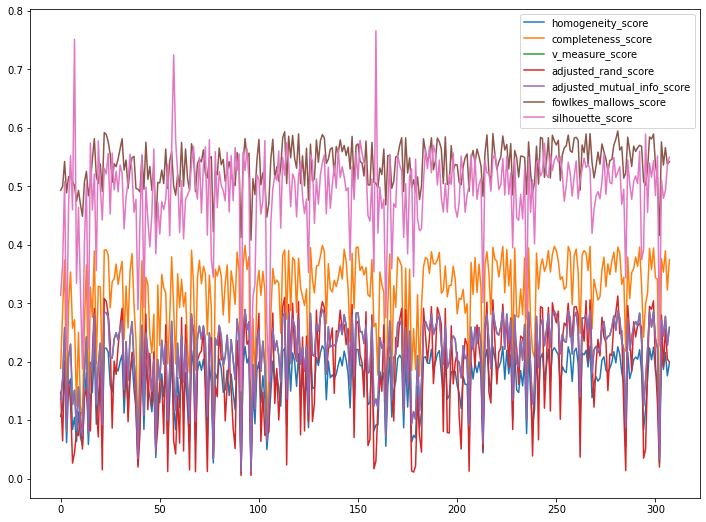

Homogeneity / completeness / v_measure는 비슷하며, v_measure는 앞 두개의 조합임. 



In [9]:
from astrobf.morph import custom_morph
labeler2 = lambda results : np.array((results['ttype'] >= 0) * (results['ttype'] < 4), dtype=int)
def labeler4(results):
    labels = np.zeros(len(results), dtype=int)
    labels[results['ttype']< 0] = 0
    labels[(results['ttype'] >= 0) * (results['ttype'] < 3)] = 1
    labels[(results['ttype'] >= 3) * (results['ttype'] < 7)] = 2
    labels[results['ttype'] >= 7] = 3
    return labels

labeler = labeler2

def evaluate(params, cluster_method="agglomerate", eval_method='sample-weighted FMS'):
    result_arr = custom_morph.step_simple_morph(all_gals, params)
    if result_arr[0] == "bad":
        #print(result_arr)
        return {"mymetric": (-1, 0), "total_flux":(result_arr[1],0)}
    Full_exp.add_ttype(result_arr, cat)
    eval_metrics = Full_exp.do_ML(result_arr, labeler, cat, n_clusters=2,
                                  fields=['gini', 'm20'], 
                                  cluster_method=cluster_method,
                                  eval_weight='area')
    
    # save all metrics to a global list.
    all_metrics.append(eval_metrics)
    #mymetric = eval_metrics[0][1] # Homogenity
    clustering_score = [val for (name, val) in eval_metrics if name == eval_method][0]
    stderr = 0.0
    return {"mymetric": (clustering_score, stderr), "total_flux":(1,0)}

In [10]:
exp_dir='./Experiments/'
fn_result = "FMS_2Gropus_agglo"
axc = AxClient()
# 0.45x is the lowest value of maximum flux of all images.
axc.create_experiment(
    parameters=[
        {"name": "b",
        "type": "range",
        "bounds": [1.0, 7.0],
        "value_type": "float",  # Optional, defaults to inference from type of "bounds".
        "log_scale": False},
        {"name": "c",
        "type": "range",
        "bounds": [0.5, 10.0]},
        {"name": "dl",
        "type": "range",
        "bounds": [0.5, 8.0]},
        {"name": "dh",
        "type": "range",
        "bounds": [0.2, 8.0]},
    ],
    objective_name="mymetric",
    #minimize=True,  # Optional, defaults to False. Maximize Shiloutte score
    parameter_constraints=["b - dl <= 100"], # all images are stretched to 100
    overwrite_existing_experiment =True,
    outcome_constraints=["total_flux >= 1e-5"],  # Optional.
)

[INFO 05-17 00:38:16] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.
[INFO 05-17 00:38:16] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter c. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 05-17 00:38:16] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dl. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 05-17 00:38:16] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dh. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 05-17 00:38:16] ax.modelbridge.

In [11]:
all_metrics=[]
for i in range(300):
    parameters, trial_index = axc.get_next_trial()
    
    axc.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters, cluster_method="agglomerate"))

pickle.dump(all_metrics, open(exp_dir+fn_result+"_all_metrics.pickle", "wb"))

[INFO 05-17 00:38:21] ax.service.ax_client: Generated new trial 0 with parameters {'b': 2.75, 'c': 1.89, 'dl': 5.72, 'dh': 2.28}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:38:34] ax.service.ax_client: Completed trial 0 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:38:34] ax.service.ax_client: Generated new trial 1 with parameters {'b': 4.47, 'c': 2.63, 'dl': 7.58, 'dh': 0.89}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:38:46] ax.service.ax_client: Completed trial 1 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:38:46] ax.service.ax_client: Generated new trial 2 with parameters {'b': 3.99, 'c': 6.34, 'dl': 2.61, 'dh': 2.82}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:38:56] ax.service.ax_client: Completed trial 2 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:38:56] ax.service.ax_client: Generated new trial 3 with parameters {'b': 3.08, 'c': 2.27, 'dl': 1.09, 'dh': 4.19}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

[INFO 05-17 00:38:56] ax.service.ax_client: Completed trial 3 with data: {'mymetric': (-1, 0), 'total_flux': (-98.0, 0)}.
[INFO 05-17 00:38:56] ax.service.ax_client: Generated new trial 4 with parameters {'b': 5.23, 'c': 1.11, 'dl': 2.53, 'dh': 0.63}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

[INFO 05-17 00:38:56] ax.service.ax_client: Completed trial 4 with data: {'mymetric': (-1, 0), 'total_flux': (0.0, 0)}.


[m20] Negative second moment(s).


[INFO 05-17 00:38:57] ax.service.ax_client: Generated new trial 5 with parameters {'b': 3.27, 'c': 3.66, 'dl': 6.55, 'dh': 1.82}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:39:10] ax.service.ax_client: Completed trial 5 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:39:12] ax.service.ax_client: Generated new trial 6 with parameters {'b': 4.08, 'c': 7.47, 'dl': 3.82, 'dh': 2.42}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:39:22] ax.service.ax_client: Completed trial 6 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:39:24] ax.service.ax_client: Generated new trial 7 with parameters {'b': 2.9, 'c': 1.51, 'dl': 7.3, 'dh': 1.62}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:39:37] ax.service.ax_client: Completed trial 7 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:39:39] ax.service.ax_client: Generated new trial 8 with parameters {'b': 4.2, 'c': 7.75, 'dl': 2.31, 'dh': 2.39}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

[INFO 05-17 00:39:39] ax.service.ax_client: Completed trial 8 with data: {'mymetric': (-1, 0), 'total_flux': (-98.0, 0)}.


[m20] Negative second moment(s).


[INFO 05-17 00:39:41] ax.service.ax_client: Generated new trial 9 with parameters {'b': 3.92, 'c': 6.19, 'dl': 3.92, 'dh': 2.8}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:39:52] ax.service.ax_client: Completed trial 9 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:39:55] ax.service.ax_client: Generated new trial 10 with parameters {'b': 3.33, 'c': 2.43, 'dl': 6.63, 'dh': 1.75}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:40:07] ax.service.ax_client: Completed trial 10 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:40:10] ax.service.ax_client: Generated new trial 11 with parameters {'b': 3.63, 'c': 5.65, 'dl': 2.86, 'dh': 3.09}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:40:19] ax.service.ax_client: Completed trial 11 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:40:21] ax.service.ax_client: Generated new trial 12 with parameters {'b': 4.09, 'c': 7.37, 'dl': 4.82, 'dh': 2.42}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:40:34] ax.service.ax_client: Completed trial 12 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:40:36] ax.service.ax_client: Generated new trial 13 with parameters {'b': 3.21, 'c': 6.97, 'dl': 4.07, 'dh': 2.29}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:40:48] ax.service.ax_client: Completed trial 13 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:40:51] ax.service.ax_client: Generated new trial 14 with parameters {'b': 4.39, 'c': 7.04, 'dl': 4.08, 'dh': 2.64}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:41:01] ax.service.ax_client: Completed trial 14 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:41:04] ax.service.ax_client: Generated new trial 15 with parameters {'b': 4.25, 'c': 6.05, 'dl': 3.15, 'dh': 2.28}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:41:13] ax.service.ax_client: Completed trial 15 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:41:15] ax.service.ax_client: Generated new trial 16 with parameters {'b': 3.73, 'c': 6.27, 'dl': 3.16, 'dh': 3.49}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:41:25] ax.service.ax_client: Completed trial 16 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:41:27] ax.service.ax_client: Generated new trial 17 with parameters {'b': 3.65, 'c': 7.9, 'dl': 4.48, 'dh': 2.85}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:41:39] ax.service.ax_client: Completed trial 17 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:41:42] ax.service.ax_client: Generated new trial 18 with parameters {'b': 4.03, 'c': 7.61, 'dl': 4.36, 'dh': 1.61}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:41:54] ax.service.ax_client: Completed trial 18 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:41:56] ax.service.ax_client: Generated new trial 19 with parameters {'b': 1.0, 'c': 2.28, 'dl': 6.52, 'dh': 1.81}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:42:10] ax.service.ax_client: Completed trial 19 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:42:12] ax.service.ax_client: Generated new trial 20 with parameters {'b': 2.31, 'c': 2.08, 'dl': 6.66, 'dh': 4.74}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:42:25] ax.service.ax_client: Completed trial 20 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:42:27] ax.service.ax_client: Generated new trial 21 with parameters {'b': 2.38, 'c': 2.9, 'dl': 7.61, 'dh': 2.56}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:42:39] ax.service.ax_client: Completed trial 21 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:42:42] ax.service.ax_client: Generated new trial 22 with parameters {'b': 1.59, 'c': 1.17, 'dl': 6.33, 'dh': 2.79}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:42:54] ax.service.ax_client: Completed trial 22 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:42:57] ax.service.ax_client: Generated new trial 23 with parameters {'b': 3.78, 'c': 6.0, 'dl': 2.6, 'dh': 2.91}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:43:06] ax.service.ax_client: Completed trial 23 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:43:08] ax.service.ax_client: Generated new trial 24 with parameters {'b': 3.05, 'c': 5.22, 'dl': 4.53, 'dh': 3.07}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:43:21] ax.service.ax_client: Completed trial 24 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:43:23] ax.service.ax_client: Generated new trial 25 with parameters {'b': 2.35, 'c': 1.73, 'dl': 6.46, 'dh': 2.57}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:43:36] ax.service.ax_client: Completed trial 25 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:43:38] ax.service.ax_client: Generated new trial 26 with parameters {'b': 2.04, 'c': 3.15, 'dl': 5.87, 'dh': 3.66}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:43:51] ax.service.ax_client: Completed trial 26 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:43:53] ax.service.ax_client: Generated new trial 27 with parameters {'b': 2.77, 'c': 3.41, 'dl': 5.56, 'dh': 0.47}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:44:06] ax.service.ax_client: Completed trial 27 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:44:08] ax.service.ax_client: Generated new trial 28 with parameters {'b': 5.15, 'c': 4.12, 'dl': 5.42, 'dh': 3.17}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:44:20] ax.service.ax_client: Completed trial 28 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:44:23] ax.service.ax_client: Generated new trial 29 with parameters {'b': 4.95, 'c': 5.24, 'dl': 4.0, 'dh': 4.63}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:44:32] ax.service.ax_client: Completed trial 29 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:44:35] ax.service.ax_client: Generated new trial 30 with parameters {'b': 3.23, 'c': 7.26, 'dl': 4.49, 'dh': 5.96}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:44:47] ax.service.ax_client: Completed trial 30 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:44:50] ax.service.ax_client: Generated new trial 31 with parameters {'b': 3.74, 'c': 7.48, 'dl': 4.22, 'dh': 3.52}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:45:02] ax.service.ax_client: Completed trial 31 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:45:06] ax.service.ax_client: Generated new trial 32 with parameters {'b': 4.02, 'c': 5.96, 'dl': 5.36, 'dh': 6.58}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:45:18] ax.service.ax_client: Completed trial 32 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:45:21] ax.service.ax_client: Generated new trial 33 with parameters {'b': 2.82, 'c': 7.43, 'dl': 5.57, 'dh': 6.34}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:45:34] ax.service.ax_client: Completed trial 33 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:45:37] ax.service.ax_client: Generated new trial 34 with parameters {'b': 2.76, 'c': 4.59, 'dl': 5.7, 'dh': 3.32}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:45:50] ax.service.ax_client: Completed trial 34 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:45:53] ax.service.ax_client: Generated new trial 35 with parameters {'b': 5.49, 'c': 5.44, 'dl': 5.48, 'dh': 1.03}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:46:04] ax.service.ax_client: Completed trial 35 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:46:07] ax.service.ax_client: Generated new trial 36 with parameters {'b': 2.11, 'c': 6.51, 'dl': 5.39, 'dh': 3.5}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:46:20] ax.service.ax_client: Completed trial 36 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:46:23] ax.service.ax_client: Generated new trial 37 with parameters {'b': 4.67, 'c': 5.75, 'dl': 4.83, 'dh': 3.92}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:46:35] ax.service.ax_client: Completed trial 37 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:46:38] ax.service.ax_client: Generated new trial 38 with parameters {'b': 5.78, 'c': 4.99, 'dl': 6.45, 'dh': 4.01}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:46:51] ax.service.ax_client: Completed trial 38 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:46:54] ax.service.ax_client: Generated new trial 39 with parameters {'b': 5.95, 'c': 4.44, 'dl': 6.15, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:47:06] ax.service.ax_client: Completed trial 39 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:47:09] ax.service.ax_client: Generated new trial 40 with parameters {'b': 5.92, 'c': 6.68, 'dl': 6.11, 'dh': 3.04}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:47:21] ax.service.ax_client: Completed trial 40 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:47:25] ax.service.ax_client: Generated new trial 41 with parameters {'b': 3.44, 'c': 5.71, 'dl': 6.38, 'dh': 1.37}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:47:38] ax.service.ax_client: Completed trial 41 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:47:41] ax.service.ax_client: Generated new trial 42 with parameters {'b': 5.06, 'c': 7.09, 'dl': 5.32, 'dh': 6.14}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:47:53] ax.service.ax_client: Completed trial 42 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:47:57] ax.service.ax_client: Generated new trial 43 with parameters {'b': 4.27, 'c': 8.01, 'dl': 5.67, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:48:10] ax.service.ax_client: Completed trial 43 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:48:14] ax.service.ax_client: Generated new trial 44 with parameters {'b': 1.66, 'c': 5.65, 'dl': 4.14, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:48:27] ax.service.ax_client: Completed trial 44 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:48:31] ax.service.ax_client: Generated new trial 45 with parameters {'b': 6.24, 'c': 3.27, 'dl': 7.14, 'dh': 6.36}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:48:44] ax.service.ax_client: Completed trial 45 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:48:48] ax.service.ax_client: Generated new trial 46 with parameters {'b': 1.78, 'c': 7.7, 'dl': 5.33, 'dh': 1.26}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:49:01] ax.service.ax_client: Completed trial 46 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:49:04] ax.service.ax_client: Generated new trial 47 with parameters {'b': 4.58, 'c': 7.91, 'dl': 5.23, 'dh': 3.59}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:49:17] ax.service.ax_client: Completed trial 47 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:49:21] ax.service.ax_client: Generated new trial 48 with parameters {'b': 4.52, 'c': 2.16, 'dl': 7.82, 'dh': 7.17}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:49:33] ax.service.ax_client: Completed trial 48 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:49:37] ax.service.ax_client: Generated new trial 49 with parameters {'b': 3.83, 'c': 2.44, 'dl': 7.4, 'dh': 4.74}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:49:50] ax.service.ax_client: Completed trial 49 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:49:54] ax.service.ax_client: Generated new trial 50 with parameters {'b': 1.0, 'c': 1.15, 'dl': 7.45, 'dh': 7.95}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:50:07] ax.service.ax_client: Completed trial 50 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:50:11] ax.service.ax_client: Generated new trial 51 with parameters {'b': 6.51, 'c': 1.0, 'dl': 7.11, 'dh': 7.93}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:50:23] ax.service.ax_client: Completed trial 51 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:50:28] ax.service.ax_client: Generated new trial 52 with parameters {'b': 3.18, 'c': 1.16, 'dl': 6.92, 'dh': 7.54}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:50:40] ax.service.ax_client: Completed trial 52 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:50:44] ax.service.ax_client: Generated new trial 53 with parameters {'b': 5.34, 'c': 1.07, 'dl': 7.98, 'dh': 5.53}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:50:57] ax.service.ax_client: Completed trial 53 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:51:02] ax.service.ax_client: Generated new trial 54 with parameters {'b': 4.45, 'c': 1.31, 'dl': 7.56, 'dh': 6.27}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:51:14] ax.service.ax_client: Completed trial 54 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:51:20] ax.service.ax_client: Generated new trial 55 with parameters {'b': 3.48, 'c': 0.5, 'dl': 7.28, 'dh': 3.79}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:51:32] ax.service.ax_client: Completed trial 55 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:51:37] ax.service.ax_client: Generated new trial 56 with parameters {'b': 7.0, 'c': 3.05, 'dl': 5.94, 'dh': 2.32}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:51:46] ax.service.ax_client: Completed trial 56 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:51:52] ax.service.ax_client: Generated new trial 57 with parameters {'b': 6.88, 'c': 6.05, 'dl': 2.84, 'dh': 5.13}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

[INFO 05-17 00:51:52] ax.service.ax_client: Completed trial 57 with data: {'mymetric': (-1, 0), 'total_flux': (0.0, 0)}.
[INFO 05-17 00:51:58] ax.service.ax_client: Generated new trial 58 with parameters {'b': 4.14, 'c': 5.22, 'dl': 4.1, 'dh': 4.42}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:52:09] ax.service.ax_client: Completed trial 58 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:52:14] ax.service.ax_client: Generated new trial 59 with parameters {'b': 3.65, 'c': 6.21, 'dl': 2.85, 'dh': 1.25}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:52:24] ax.service.ax_client: Completed trial 59 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:52:29] ax.service.ax_client: Generated new trial 60 with parameters {'b': 5.51, 'c': 3.02, 'dl': 6.0, 'dh': 2.63}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:52:41] ax.service.ax_client: Completed trial 60 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:52:47] ax.service.ax_client: Generated new trial 61 with parameters {'b': 6.76, 'c': 2.11, 'dl': 7.28, 'dh': 2.04}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:53:00] ax.service.ax_client: Completed trial 61 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:53:05] ax.service.ax_client: Generated new trial 62 with parameters {'b': 4.75, 'c': 6.65, 'dl': 6.04, 'dh': 3.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:53:17] ax.service.ax_client: Completed trial 62 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:53:23] ax.service.ax_client: Generated new trial 63 with parameters {'b': 1.0, 'c': 5.31, 'dl': 4.77, 'dh': 3.36}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:53:35] ax.service.ax_client: Completed trial 63 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:53:42] ax.service.ax_client: Generated new trial 64 with parameters {'b': 5.31, 'c': 1.11, 'dl': 6.63, 'dh': 2.75}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:53:54] ax.service.ax_client: Completed trial 64 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:54:00] ax.service.ax_client: Generated new trial 65 with parameters {'b': 3.1, 'c': 7.8, 'dl': 5.29, 'dh': 1.97}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:54:13] ax.service.ax_client: Completed trial 65 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:54:19] ax.service.ax_client: Generated new trial 66 with parameters {'b': 1.0, 'c': 7.16, 'dl': 4.87, 'dh': 7.69}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:54:31] ax.service.ax_client: Completed trial 66 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:54:38] ax.service.ax_client: Generated new trial 67 with parameters {'b': 2.29, 'c': 1.19, 'dl': 7.53, 'dh': 7.24}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:54:50] ax.service.ax_client: Completed trial 67 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:54:57] ax.service.ax_client: Generated new trial 68 with parameters {'b': 1.73, 'c': 5.8, 'dl': 5.09, 'dh': 7.65}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:55:10] ax.service.ax_client: Completed trial 68 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:55:16] ax.service.ax_client: Generated new trial 69 with parameters {'b': 5.8, 'c': 1.39, 'dl': 7.54, 'dh': 5.74}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:55:28] ax.service.ax_client: Completed trial 69 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:55:35] ax.service.ax_client: Generated new trial 70 with parameters {'b': 1.0, 'c': 4.85, 'dl': 6.65, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:55:47] ax.service.ax_client: Completed trial 70 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:55:55] ax.service.ax_client: Generated new trial 71 with parameters {'b': 2.45, 'c': 4.81, 'dl': 6.61, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:56:07] ax.service.ax_client: Completed trial 71 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:56:14] ax.service.ax_client: Generated new trial 72 with parameters {'b': 1.0, 'c': 4.05, 'dl': 7.12, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:56:27] ax.service.ax_client: Completed trial 72 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:56:34] ax.service.ax_client: Generated new trial 73 with parameters {'b': 3.23, 'c': 3.97, 'dl': 7.11, 'dh': 7.9}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:56:47] ax.service.ax_client: Completed trial 73 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:56:55] ax.service.ax_client: Generated new trial 74 with parameters {'b': 2.08, 'c': 7.16, 'dl': 4.88, 'dh': 7.42}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:57:07] ax.service.ax_client: Completed trial 74 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:57:14] ax.service.ax_client: Generated new trial 75 with parameters {'b': 1.0, 'c': 5.84, 'dl': 6.35, 'dh': 4.55}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:57:27] ax.service.ax_client: Completed trial 75 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:57:34] ax.service.ax_client: Generated new trial 76 with parameters {'b': 5.61, 'c': 2.42, 'dl': 6.73, 'dh': 1.95}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:57:46] ax.service.ax_client: Completed trial 76 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:57:54] ax.service.ax_client: Generated new trial 77 with parameters {'b': 1.09, 'c': 0.59, 'dl': 7.27, 'dh': 3.47}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:58:06] ax.service.ax_client: Completed trial 77 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:58:13] ax.service.ax_client: Generated new trial 78 with parameters {'b': 4.36, 'c': 4.77, 'dl': 6.53, 'dh': 0.61}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:58:26] ax.service.ax_client: Completed trial 78 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:58:33] ax.service.ax_client: Generated new trial 79 with parameters {'b': 1.0, 'c': 4.61, 'dl': 5.76, 'dh': 3.33}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:58:46] ax.service.ax_client: Completed trial 79 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:58:54] ax.service.ax_client: Generated new trial 80 with parameters {'b': 7.0, 'c': 0.53, 'dl': 7.27, 'dh': 3.36}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:59:06] ax.service.ax_client: Completed trial 80 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:59:13] ax.service.ax_client: Generated new trial 81 with parameters {'b': 4.92, 'c': 5.15, 'dl': 4.46, 'dh': 1.02}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:59:23] ax.service.ax_client: Completed trial 81 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:59:32] ax.service.ax_client: Generated new trial 82 with parameters {'b': 4.88, 'c': 3.91, 'dl': 7.1, 'dh': 7.7}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 00:59:44] ax.service.ax_client: Completed trial 82 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 00:59:53] ax.service.ax_client: Generated new trial 83 with parameters {'b': 1.0, 'c': 1.17, 'dl': 6.87, 'dh': 7.46}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:00:05] ax.service.ax_client: Completed trial 83 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:00:14] ax.service.ax_client: Generated new trial 84 with parameters {'b': 7.0, 'c': 1.11, 'dl': 6.67, 'dh': 2.5}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:00:25] ax.service.ax_client: Completed trial 84 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:00:32] ax.service.ax_client: Generated new trial 85 with parameters {'b': 6.89, 'c': 3.81, 'dl': 6.11, 'dh': 7.89}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:00:42] ax.service.ax_client: Completed trial 85 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:00:50] ax.service.ax_client: Generated new trial 86 with parameters {'b': 5.27, 'c': 3.81, 'dl': 6.13, 'dh': 7.84}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:01:03] ax.service.ax_client: Completed trial 86 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:01:10] ax.service.ax_client: Generated new trial 87 with parameters {'b': 1.06, 'c': 1.47, 'dl': 7.29, 'dh': 1.67}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:01:23] ax.service.ax_client: Completed trial 87 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:01:32] ax.service.ax_client: Generated new trial 88 with parameters {'b': 5.57, 'c': 0.5, 'dl': 7.29, 'dh': 3.05}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:01:44] ax.service.ax_client: Completed trial 88 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:01:52] ax.service.ax_client: Generated new trial 89 with parameters {'b': 1.0, 'c': 3.66, 'dl': 6.59, 'dh': 1.43}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:02:04] ax.service.ax_client: Completed trial 89 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:02:12] ax.service.ax_client: Generated new trial 90 with parameters {'b': 7.0, 'c': 3.67, 'dl': 6.58, 'dh': 2.23}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:02:22] ax.service.ax_client: Completed trial 90 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:02:32] ax.service.ax_client: Generated new trial 91 with parameters {'b': 5.52, 'c': 3.65, 'dl': 6.63, 'dh': 2.28}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:02:44] ax.service.ax_client: Completed trial 91 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:02:52] ax.service.ax_client: Generated new trial 92 with parameters {'b': 3.37, 'c': 6.35, 'dl': 8.0, 'dh': 3.28}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:03:04] ax.service.ax_client: Completed trial 92 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:03:13] ax.service.ax_client: Generated new trial 93 with parameters {'b': 5.75, 'c': 6.32, 'dl': 7.88, 'dh': 3.16}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:03:26] ax.service.ax_client: Completed trial 93 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:03:35] ax.service.ax_client: Generated new trial 94 with parameters {'b': 4.34, 'c': 6.17, 'dl': 7.4, 'dh': 7.79}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:03:47] ax.service.ax_client: Completed trial 94 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:03:56] ax.service.ax_client: Generated new trial 95 with parameters {'b': 1.0, 'c': 6.26, 'dl': 7.82, 'dh': 3.14}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:04:08] ax.service.ax_client: Completed trial 95 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:04:18] ax.service.ax_client: Generated new trial 96 with parameters {'b': 1.0, 'c': 7.54, 'dl': 6.88, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:04:30] ax.service.ax_client: Completed trial 96 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:04:40] ax.service.ax_client: Generated new trial 97 with parameters {'b': 3.67, 'c': 7.47, 'dl': 6.95, 'dh': 0.28}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:04:52] ax.service.ax_client: Completed trial 97 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:05:01] ax.service.ax_client: Generated new trial 98 with parameters {'b': 2.26, 'c': 6.17, 'dl': 7.43, 'dh': 6.92}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:05:13] ax.service.ax_client: Completed trial 98 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:05:23] ax.service.ax_client: Generated new trial 99 with parameters {'b': 6.03, 'c': 7.42, 'dl': 6.98, 'dh': 0.41}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:05:35] ax.service.ax_client: Completed trial 99 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:05:45] ax.service.ax_client: Generated new trial 100 with parameters {'b': 7.0, 'c': 6.18, 'dl': 7.39, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:05:57] ax.service.ax_client: Completed trial 100 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:06:07] ax.service.ax_client: Generated new trial 101 with parameters {'b': 3.47, 'c': 4.77, 'dl': 7.97, 'dh': 1.44}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:06:19] ax.service.ax_client: Completed trial 101 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:06:29] ax.service.ax_client: Generated new trial 102 with parameters {'b': 6.73, 'c': 4.75, 'dl': 7.93, 'dh': 1.81}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:06:41] ax.service.ax_client: Completed trial 102 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:06:52] ax.service.ax_client: Generated new trial 103 with parameters {'b': 1.06, 'c': 4.79, 'dl': 7.99, 'dh': 1.28}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:07:05] ax.service.ax_client: Completed trial 103 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:07:15] ax.service.ax_client: Generated new trial 104 with parameters {'b': 7.0, 'c': 5.84, 'dl': 7.13, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:07:26] ax.service.ax_client: Completed trial 104 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:07:38] ax.service.ax_client: Generated new trial 105 with parameters {'b': 5.39, 'c': 5.85, 'dl': 7.16, 'dh': 0.41}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:07:50] ax.service.ax_client: Completed trial 105 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:08:00] ax.service.ax_client: Generated new trial 106 with parameters {'b': 1.0, 'c': 6.18, 'dl': 2.8, 'dh': 2.44}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:08:13] ax.service.ax_client: Completed trial 106 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:08:24] ax.service.ax_client: Generated new trial 107 with parameters {'b': 1.55, 'c': 5.49, 'dl': 4.48, 'dh': 6.26}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:08:36] ax.service.ax_client: Completed trial 107 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:08:47] ax.service.ax_client: Generated new trial 108 with parameters {'b': 6.24, 'c': 1.39, 'dl': 5.36, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:08:56] ax.service.ax_client: Completed trial 108 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:09:07] ax.service.ax_client: Generated new trial 109 with parameters {'b': 2.77, 'c': 6.24, 'dl': 2.84, 'dh': 2.73}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:09:18] ax.service.ax_client: Completed trial 109 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:09:29] ax.service.ax_client: Generated new trial 110 with parameters {'b': 1.0, 'c': 5.58, 'dl': 3.07, 'dh': 5.34}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:09:41] ax.service.ax_client: Completed trial 110 with data: {'mymetric': (0.68999999999999995, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:09:51] ax.service.ax_client: Generated new trial 111 with parameters {'b': 2.09, 'c': 5.88, 'dl': 7.23, 'dh': 0.39}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:10:03] ax.service.ax_client: Completed trial 111 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:10:13] ax.service.ax_client: Generated new trial 112 with parameters {'b': 6.35, 'c': 1.95, 'dl': 6.02, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:10:24] ax.service.ax_client: Completed trial 112 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:10:35] ax.service.ax_client: Generated new trial 113 with parameters {'b': 1.0, 'c': 6.42, 'dl': 3.49, 'dh': 4.96}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:10:47] ax.service.ax_client: Completed trial 113 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:10:59] ax.service.ax_client: Generated new trial 114 with parameters {'b': 4.44, 'c': 1.91, 'dl': 5.92, 'dh': 6.86}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:11:11] ax.service.ax_client: Completed trial 114 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:11:23] ax.service.ax_client: Generated new trial 115 with parameters {'b': 2.32, 'c': 5.39, 'dl': 5.38, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:11:36] ax.service.ax_client: Completed trial 115 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:11:47] ax.service.ax_client: Generated new trial 116 with parameters {'b': 5.82, 'c': 0.58, 'dl': 5.89, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:11:58] ax.service.ax_client: Completed trial 116 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:12:10] ax.service.ax_client: Generated new trial 117 with parameters {'b': 1.0, 'c': 3.43, 'dl': 5.53, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:12:22] ax.service.ax_client: Completed trial 117 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:12:35] ax.service.ax_client: Generated new trial 118 with parameters {'b': 5.57, 'c': 1.85, 'dl': 5.67, 'dh': 1.01}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:12:47] ax.service.ax_client: Completed trial 118 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:12:59] ax.service.ax_client: Generated new trial 119 with parameters {'b': 3.71, 'c': 0.61, 'dl': 5.9, 'dh': 7.71}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:13:11] ax.service.ax_client: Completed trial 119 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:13:24] ax.service.ax_client: Generated new trial 120 with parameters {'b': 5.25, 'c': 4.75, 'dl': 7.93, 'dh': 2.78}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:13:37] ax.service.ax_client: Completed trial 120 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:13:51] ax.service.ax_client: Generated new trial 121 with parameters {'b': 1.93, 'c': 6.15, 'dl': 2.65, 'dh': 5.6}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:14:03] ax.service.ax_client: Completed trial 121 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:14:15] ax.service.ax_client: Generated new trial 122 with parameters {'b': 3.54, 'c': 8.51, 'dl': 7.17, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:14:27] ax.service.ax_client: Completed trial 122 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:14:41] ax.service.ax_client: Generated new trial 123 with parameters {'b': 1.0, 'c': 8.46, 'dl': 7.13, 'dh': 7.93}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:14:53] ax.service.ax_client: Completed trial 123 with data: {'mymetric': (0.68999999999999995, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:15:06] ax.service.ax_client: Generated new trial 124 with parameters {'b': 6.31, 'c': 8.55, 'dl': 7.21, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:15:18] ax.service.ax_client: Completed trial 124 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:15:31] ax.service.ax_client: Generated new trial 125 with parameters {'b': 5.27, 'c': 7.84, 'dl': 6.76, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:15:44] ax.service.ax_client: Completed trial 125 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:15:58] ax.service.ax_client: Generated new trial 126 with parameters {'b': 2.24, 'c': 4.73, 'dl': 7.88, 'dh': 5.46}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:16:10] ax.service.ax_client: Completed trial 126 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:16:24] ax.service.ax_client: Generated new trial 127 with parameters {'b': 4.91, 'c': 8.61, 'dl': 7.38, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:16:37] ax.service.ax_client: Completed trial 127 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:16:50] ax.service.ax_client: Generated new trial 128 with parameters {'b': 2.34, 'c': 8.58, 'dl': 7.34, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:17:02] ax.service.ax_client: Completed trial 128 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:17:16] ax.service.ax_client: Generated new trial 129 with parameters {'b': 5.41, 'c': 7.85, 'dl': 7.91, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:17:29] ax.service.ax_client: Completed trial 129 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:17:44] ax.service.ax_client: Generated new trial 130 with parameters {'b': 2.4, 'c': 7.84, 'dl': 7.88, 'dh': 7.19}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:17:57] ax.service.ax_client: Completed trial 130 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:18:12] ax.service.ax_client: Generated new trial 131 with parameters {'b': 2.23, 'c': 7.84, 'dl': 6.78, 'dh': 6.61}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:18:24] ax.service.ax_client: Completed trial 131 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:18:38] ax.service.ax_client: Generated new trial 132 with parameters {'b': 1.0, 'c': 1.9, 'dl': 5.82, 'dh': 6.32}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:18:51] ax.service.ax_client: Completed trial 132 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:19:05] ax.service.ax_client: Generated new trial 133 with parameters {'b': 7.0, 'c': 7.85, 'dl': 7.94, 'dh': 7.66}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:19:18] ax.service.ax_client: Completed trial 133 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:19:32] ax.service.ax_client: Generated new trial 134 with parameters {'b': 1.0, 'c': 7.78, 'dl': 7.94, 'dh': 1.32}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:19:44] ax.service.ax_client: Completed trial 134 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:19:59] ax.service.ax_client: Generated new trial 135 with parameters {'b': 3.45, 'c': 7.77, 'dl': 7.96, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:20:11] ax.service.ax_client: Completed trial 135 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:20:25] ax.service.ax_client: Generated new trial 136 with parameters {'b': 7.0, 'c': 8.64, 'dl': 7.44, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:20:37] ax.service.ax_client: Completed trial 136 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:20:52] ax.service.ax_client: Generated new trial 137 with parameters {'b': 7.0, 'c': 7.74, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:21:05] ax.service.ax_client: Completed trial 137 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:21:17] ax.service.ax_client: Generated new trial 138 with parameters {'b': 7.0, 'c': 1.1, 'dl': 8.0, 'dh': 5.43}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:21:29] ax.service.ax_client: Completed trial 138 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:21:42] ax.service.ax_client: Generated new trial 139 with parameters {'b': 7.0, 'c': 4.67, 'dl': 7.71, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:21:54] ax.service.ax_client: Completed trial 139 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:22:10] ax.service.ax_client: Generated new trial 140 with parameters {'b': 1.0, 'c': 6.65, 'dl': 5.84, 'dh': 2.1}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:22:22] ax.service.ax_client: Completed trial 140 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:22:37] ax.service.ax_client: Generated new trial 141 with parameters {'b': 3.93, 'c': 7.14, 'dl': 3.83, 'dh': 1.06}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:22:48] ax.service.ax_client: Completed trial 141 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:23:01] ax.service.ax_client: Generated new trial 142 with parameters {'b': 7.0, 'c': 0.9, 'dl': 5.84, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:23:11] ax.service.ax_client: Completed trial 142 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:23:27] ax.service.ax_client: Generated new trial 143 with parameters {'b': 1.51, 'c': 0.99, 'dl': 8.0, 'dh': 4.33}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:23:40] ax.service.ax_client: Completed trial 143 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:23:58] ax.service.ax_client: Generated new trial 144 with parameters {'b': 1.0, 'c': 0.59, 'dl': 5.9, 'dh': 7.95}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:24:11] ax.service.ax_client: Completed trial 144 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:24:26] ax.service.ax_client: Generated new trial 145 with parameters {'b': 5.69, 'c': 1.08, 'dl': 5.83, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:24:38] ax.service.ax_client: Completed trial 145 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:24:53] ax.service.ax_client: Generated new trial 146 with parameters {'b': 2.28, 'c': 1.15, 'dl': 5.88, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:25:06] ax.service.ax_client: Completed trial 146 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:25:23] ax.service.ax_client: Generated new trial 147 with parameters {'b': 1.0, 'c': 2.23, 'dl': 7.87, 'dh': 7.81}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:25:36] ax.service.ax_client: Completed trial 147 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:25:52] ax.service.ax_client: Generated new trial 148 with parameters {'b': 1.0, 'c': 6.66, 'dl': 4.43, 'dh': 1.29}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:26:05] ax.service.ax_client: Completed trial 148 with data: {'mymetric': (0.68999999999999995, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:26:21] ax.service.ax_client: Generated new trial 149 with parameters {'b': 7.0, 'c': 1.8, 'dl': 5.67, 'dh': 3.15}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:26:30] ax.service.ax_client: Completed trial 149 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:26:46] ax.service.ax_client: Generated new trial 150 with parameters {'b': 3.67, 'c': 6.92, 'dl': 3.92, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:26:58] ax.service.ax_client: Completed trial 150 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:27:14] ax.service.ax_client: Generated new trial 151 with parameters {'b': 3.63, 'c': 6.22, 'dl': 2.77, 'dh': 6.14}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:27:23] ax.service.ax_client: Completed trial 151 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:27:39] ax.service.ax_client: Generated new trial 152 with parameters {'b': 1.0, 'c': 8.46, 'dl': 6.04, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:27:52] ax.service.ax_client: Completed trial 152 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:28:08] ax.service.ax_client: Generated new trial 153 with parameters {'b': 3.11, 'c': 8.61, 'dl': 6.11, 'dh': 1.01}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:28:21] ax.service.ax_client: Completed trial 153 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:28:38] ax.service.ax_client: Generated new trial 154 with parameters {'b': 5.6, 'c': 8.71, 'dl': 6.16, 'dh': 1.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:28:50] ax.service.ax_client: Completed trial 154 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:29:05] ax.service.ax_client: Generated new trial 155 with parameters {'b': 7.0, 'c': 7.8, 'dl': 6.99, 'dh': 5.06}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:29:16] ax.service.ax_client: Completed trial 155 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:29:31] ax.service.ax_client: Generated new trial 156 with parameters {'b': 7.0, 'c': 2.21, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:29:43] ax.service.ax_client: Completed trial 156 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:30:00] ax.service.ax_client: Generated new trial 157 with parameters {'b': 7.0, 'c': 2.71, 'dl': 7.9, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:30:12] ax.service.ax_client: Completed trial 157 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:30:29] ax.service.ax_client: Generated new trial 158 with parameters {'b': 5.76, 'c': 2.79, 'dl': 8.0, 'dh': 2.81}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:30:42] ax.service.ax_client: Completed trial 158 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:30:59] ax.service.ax_client: Generated new trial 159 with parameters {'b': 1.0, 'c': 2.87, 'dl': 7.75, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:31:11] ax.service.ax_client: Completed trial 159 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:31:26] ax.service.ax_client: Generated new trial 160 with parameters {'b': 7.0, 'c': 6.35, 'dl': 8.0, 'dh': 2.27}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:31:38] ax.service.ax_client: Completed trial 160 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:31:54] ax.service.ax_client: Generated new trial 161 with parameters {'b': 3.91, 'c': 1.11, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:32:06] ax.service.ax_client: Completed trial 161 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:32:22] ax.service.ax_client: Generated new trial 162 with parameters {'b': 1.0, 'c': 7.5, 'dl': 5.7, 'dh': 7.42}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:32:34] ax.service.ax_client: Completed trial 162 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:32:51] ax.service.ax_client: Generated new trial 163 with parameters {'b': 3.67, 'c': 1.1, 'dl': 6.35, 'dh': 0.6}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:33:04] ax.service.ax_client: Completed trial 163 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:33:19] ax.service.ax_client: Generated new trial 164 with parameters {'b': 1.61, 'c': 6.03, 'dl': 3.02, 'dh': 3.64}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:33:31] ax.service.ax_client: Completed trial 164 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:33:49] ax.service.ax_client: Generated new trial 165 with parameters {'b': 4.11, 'c': 4.75, 'dl': 7.73, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:34:01] ax.service.ax_client: Completed trial 165 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:34:17] ax.service.ax_client: Generated new trial 166 with parameters {'b': 6.39, 'c': 1.29, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:34:30] ax.service.ax_client: Completed trial 166 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:34:45] ax.service.ax_client: Generated new trial 167 with parameters {'b': 5.92, 'c': 8.45, 'dl': 7.12, 'dh': 2.68}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:34:58] ax.service.ax_client: Completed trial 167 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:35:15] ax.service.ax_client: Generated new trial 168 with parameters {'b': 4.47, 'c': 9.75, 'dl': 8.0, 'dh': 7.67}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:35:27] ax.service.ax_client: Completed trial 168 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:35:46] ax.service.ax_client: Generated new trial 169 with parameters {'b': 7.0, 'c': 9.79, 'dl': 8.0, 'dh': 6.83}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:35:58] ax.service.ax_client: Completed trial 169 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:36:15] ax.service.ax_client: Generated new trial 170 with parameters {'b': 1.0, 'c': 9.77, 'dl': 8.0, 'dh': 0.33}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:36:28] ax.service.ax_client: Completed trial 170 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:36:44] ax.service.ax_client: Generated new trial 171 with parameters {'b': 5.3, 'c': 9.94, 'dl': 7.31, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:36:57] ax.service.ax_client: Completed trial 171 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:37:12] ax.service.ax_client: Generated new trial 172 with parameters {'b': 2.55, 'c': 9.92, 'dl': 7.32, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:37:24] ax.service.ax_client: Completed trial 172 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:37:41] ax.service.ax_client: Generated new trial 173 with parameters {'b': 5.51, 'c': 9.8, 'dl': 8.0, 'dh': 0.22}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:37:54] ax.service.ax_client: Completed trial 173 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:38:12] ax.service.ax_client: Generated new trial 174 with parameters {'b': 1.9, 'c': 9.68, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:38:24] ax.service.ax_client: Completed trial 174 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:38:40] ax.service.ax_client: Generated new trial 175 with parameters {'b': 2.93, 'c': 9.7, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:38:53] ax.service.ax_client: Completed trial 175 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:39:12] ax.service.ax_client: Generated new trial 176 with parameters {'b': 1.0, 'c': 9.89, 'dl': 7.24, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:39:25] ax.service.ax_client: Completed trial 176 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:39:45] ax.service.ax_client: Generated new trial 177 with parameters {'b': 7.0, 'c': 9.9, 'dl': 7.11, 'dh': 0.54}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:39:56] ax.service.ax_client: Completed trial 177 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:40:16] ax.service.ax_client: Generated new trial 178 with parameters {'b': 6.08, 'c': 9.38, 'dl': 7.84, 'dh': 4.81}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:40:28] ax.service.ax_client: Completed trial 178 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:40:46] ax.service.ax_client: Generated new trial 179 with parameters {'b': 4.66, 'c': 9.6, 'dl': 6.77, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:40:59] ax.service.ax_client: Completed trial 179 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:41:18] ax.service.ax_client: Generated new trial 180 with parameters {'b': 7.0, 'c': 9.65, 'dl': 6.81, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:41:29] ax.service.ax_client: Completed trial 180 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:41:46] ax.service.ax_client: Generated new trial 181 with parameters {'b': 3.67, 'c': 9.26, 'dl': 7.75, 'dh': 4.59}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:41:58] ax.service.ax_client: Completed trial 181 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:42:15] ax.service.ax_client: Generated new trial 182 with parameters {'b': 2.16, 'c': 0.5, 'dl': 6.47, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:42:27] ax.service.ax_client: Completed trial 182 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:42:43] ax.service.ax_client: Generated new trial 183 with parameters {'b': 1.64, 'c': 6.84, 'dl': 4.1, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:42:56] ax.service.ax_client: Completed trial 183 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:43:15] ax.service.ax_client: Generated new trial 184 with parameters {'b': 1.81, 'c': 4.12, 'dl': 5.28, 'dh': 3.24}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:43:28] ax.service.ax_client: Completed trial 184 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:43:45] ax.service.ax_client: Generated new trial 185 with parameters {'b': 1.0, 'c': 9.11, 'dl': 7.65, 'dh': 0.37}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:43:58] ax.service.ax_client: Completed trial 185 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:44:14] ax.service.ax_client: Generated new trial 186 with parameters {'b': 4.6, 'c': 0.5, 'dl': 6.59, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:44:27] ax.service.ax_client: Completed trial 186 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:44:45] ax.service.ax_client: Generated new trial 187 with parameters {'b': 1.0, 'c': 9.59, 'dl': 6.51, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:44:58] ax.service.ax_client: Completed trial 187 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:45:17] ax.service.ax_client: Generated new trial 188 with parameters {'b': 2.57, 'c': 9.65, 'dl': 6.41, 'dh': 6.59}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:45:30] ax.service.ax_client: Completed trial 188 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:45:48] ax.service.ax_client: Generated new trial 189 with parameters {'b': 1.0, 'c': 9.68, 'dl': 6.27, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:46:01] ax.service.ax_client: Completed trial 189 with data: {'mymetric': (0.69999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:46:19] ax.service.ax_client: Generated new trial 190 with parameters {'b': 4.33, 'c': 9.69, 'dl': 6.3, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:46:31] ax.service.ax_client: Completed trial 190 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:46:50] ax.service.ax_client: Generated new trial 191 with parameters {'b': 2.01, 'c': 7.23, 'dl': 7.67, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:47:02] ax.service.ax_client: Completed trial 191 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:47:21] ax.service.ax_client: Generated new trial 192 with parameters {'b': 5.92, 'c': 9.61, 'dl': 6.6, 'dh': 2.35}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:47:34] ax.service.ax_client: Completed trial 192 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:47:54] ax.service.ax_client: Generated new trial 193 with parameters {'b': 7.0, 'c': 0.5, 'dl': 6.56, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:48:03] ax.service.ax_client: Completed trial 193 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:48:21] ax.service.ax_client: Generated new trial 194 with parameters {'b': 6.37, 'c': 0.61, 'dl': 6.17, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:48:32] ax.service.ax_client: Completed trial 194 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:48:53] ax.service.ax_client: Generated new trial 195 with parameters {'b': 2.76, 'c': 2.15, 'dl': 8.0, 'dh': 5.58}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:49:05] ax.service.ax_client: Completed trial 195 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:49:24] ax.service.ax_client: Generated new trial 196 with parameters {'b': 1.0, 'c': 2.03, 'dl': 8.0, 'dh': 0.35}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:49:37] ax.service.ax_client: Completed trial 196 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:49:57] ax.service.ax_client: Generated new trial 197 with parameters {'b': 4.49, 'c': 8.83, 'dl': 6.29, 'dh': 1.79}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:50:09] ax.service.ax_client: Completed trial 197 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:50:29] ax.service.ax_client: Generated new trial 198 with parameters {'b': 3.88, 'c': 2.91, 'dl': 8.0, 'dh': 7.47}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:50:42] ax.service.ax_client: Completed trial 198 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:51:02] ax.service.ax_client: Generated new trial 199 with parameters {'b': 1.0, 'c': 3.49, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:51:14] ax.service.ax_client: Completed trial 199 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:51:35] ax.service.ax_client: Generated new trial 200 with parameters {'b': 6.37, 'c': 9.97, 'dl': 7.42, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:51:47] ax.service.ax_client: Completed trial 200 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:52:06] ax.service.ax_client: Generated new trial 201 with parameters {'b': 7.0, 'c': 3.57, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:52:18] ax.service.ax_client: Completed trial 201 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:52:39] ax.service.ax_client: Generated new trial 202 with parameters {'b': 4.91, 'c': 3.71, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:52:51] ax.service.ax_client: Completed trial 202 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:53:11] ax.service.ax_client: Generated new trial 203 with parameters {'b': 1.0, 'c': 1.86, 'dl': 5.59, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:53:23] ax.service.ax_client: Completed trial 203 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:53:44] ax.service.ax_client: Generated new trial 204 with parameters {'b': 4.63, 'c': 0.5, 'dl': 6.25, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:53:56] ax.service.ax_client: Completed trial 204 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:54:16] ax.service.ax_client: Generated new trial 205 with parameters {'b': 2.91, 'c': 3.8, 'dl': 8.0, 'dh': 5.46}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:54:28] ax.service.ax_client: Completed trial 205 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:54:50] ax.service.ax_client: Generated new trial 206 with parameters {'b': 1.0, 'c': 3.84, 'dl': 8.0, 'dh': 0.26}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:55:02] ax.service.ax_client: Completed trial 206 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:55:24] ax.service.ax_client: Generated new trial 207 with parameters {'b': 6.24, 'c': 3.82, 'dl': 7.98, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:55:37] ax.service.ax_client: Completed trial 207 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:55:57] ax.service.ax_client: Generated new trial 208 with parameters {'b': 6.07, 'c': 2.99, 'dl': 5.53, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:56:07] ax.service.ax_client: Completed trial 208 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:56:29] ax.service.ax_client: Generated new trial 209 with parameters {'b': 3.8, 'c': 2.97, 'dl': 5.47, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:56:41] ax.service.ax_client: Completed trial 209 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:57:01] ax.service.ax_client: Generated new trial 210 with parameters {'b': 1.0, 'c': 0.5, 'dl': 6.07, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:57:13] ax.service.ax_client: Completed trial 210 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:57:33] ax.service.ax_client: Generated new trial 211 with parameters {'b': 3.31, 'c': 10.0, 'dl': 7.34, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:57:45] ax.service.ax_client: Completed trial 211 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:58:06] ax.service.ax_client: Generated new trial 212 with parameters {'b': 2.84, 'c': 6.02, 'dl': 4.68, 'dh': 5.63}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:58:19] ax.service.ax_client: Completed trial 212 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:58:40] ax.service.ax_client: Generated new trial 213 with parameters {'b': 2.36, 'c': 6.78, 'dl': 6.18, 'dh': 0.36}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:58:52] ax.service.ax_client: Completed trial 213 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:59:15] ax.service.ax_client: Generated new trial 214 with parameters {'b': 5.58, 'c': 4.71, 'dl': 5.58, 'dh': 6.17}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:59:26] ax.service.ax_client: Completed trial 214 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 01:59:45] ax.service.ax_client: Generated new trial 215 with parameters {'b': 4.05, 'c': 7.28, 'dl': 7.64, 'dh': 5.92}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 01:59:58] ax.service.ax_client: Completed trial 215 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:00:17] ax.service.ax_client: Generated new trial 216 with parameters {'b': 7.0, 'c': 2.84, 'dl': 6.18, 'dh': 7.39}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:00:26] ax.service.ax_client: Completed trial 216 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:00:47] ax.service.ax_client: Generated new trial 217 with parameters {'b': 1.0, 'c': 10.0, 'dl': 7.36, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:00:59] ax.service.ax_client: Completed trial 217 with data: {'mymetric': (0.68000000000000005, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:01:22] ax.service.ax_client: Generated new trial 218 with parameters {'b': 1.61, 'c': 9.12, 'dl': 6.52, 'dh': 2.56}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:01:34] ax.service.ax_client: Completed trial 218 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:01:55] ax.service.ax_client: Generated new trial 219 with parameters {'b': 6.32, 'c': 7.18, 'dl': 7.55, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:02:07] ax.service.ax_client: Completed trial 219 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:02:29] ax.service.ax_client: Generated new trial 220 with parameters {'b': 6.0, 'c': 5.99, 'dl': 6.5, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:02:41] ax.service.ax_client: Completed trial 220 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:03:02] ax.service.ax_client: Generated new trial 221 with parameters {'b': 7.0, 'c': 9.49, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:03:14] ax.service.ax_client: Completed trial 221 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:03:37] ax.service.ax_client: Generated new trial 222 with parameters {'b': 1.0, 'c': 8.79, 'dl': 5.62, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:03:49] ax.service.ax_client: Completed trial 222 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:04:08] ax.service.ax_client: Generated new trial 223 with parameters {'b': 3.19, 'c': 8.85, 'dl': 5.56, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:04:21] ax.service.ax_client: Completed trial 223 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:04:44] ax.service.ax_client: Generated new trial 224 with parameters {'b': 3.39, 'c': 5.09, 'dl': 6.49, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:04:56] ax.service.ax_client: Completed trial 224 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:05:20] ax.service.ax_client: Generated new trial 225 with parameters {'b': 1.0, 'c': 2.85, 'dl': 6.01, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:05:32] ax.service.ax_client: Completed trial 225 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:05:51] ax.service.ax_client: Generated new trial 226 with parameters {'b': 3.8, 'c': 2.88, 'dl': 6.25, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:06:04] ax.service.ax_client: Completed trial 226 with data: {'mymetric': (0.71999999999999997, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:06:27] ax.service.ax_client: Generated new trial 227 with parameters {'b': 1.0, 'c': 5.45, 'dl': 5.61, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:06:39] ax.service.ax_client: Completed trial 227 with data: {'mymetric': (0.68999999999999995, 0.0), 'total_flux': (1, 0)}.
[INFO 05-17 02:07:03] ax.service.ax_client: Generated new trial 228 with parameters {'b': 1.0, 'c': 2.94, 'dl': 5.3, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-9-67c1da18f279>:15: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 3869/9536


[INFO 05-17 02:07:16] ax.service.ax_client: Completed trial 228 with data: {'mymetric': (0.70999999999999996, 0.0), 'total_flux': (1, 0)}.


KeyboardInterrupt: 

In [13]:
if True:
    axc.save_to_json_file(exp_dir+fn_result+".json")
else:
    axc = AxClient.load_from_json_file(exp_dir+fn_result+'.json')

[INFO 05-17 02:07:40] ax.service.ax_client: Saved JSON-serialized state of optimization to `./Experiments/FMS_2Gropus_agglo.json`.


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
for i in [0,1,2,5,9]:
    values =[al[i][1] for al in all_metrics] 
    ax.plot(values / np.max(values), label=all_metrics[0][i][0])
ax.legend()
plt.show()
plt.savefig(fn_result+"param_evol.png")

In [ ]:
print(axc.generation_strategy.trials_as_df)
render(axc.get_optimization_trace())

In [ ]:
best_parameters, values = axc.get_best_parameters()
from astrobf.tmo import Mantiuk_Seidel
plt.plot(Mantiuk_Seidel(np.linspace(0,100,100), **best_parameters))

In [64]:
axc = AxClient.load_from_json_file("./Experiments/Ward_3to7_rescale100.json")

[INFO 05-16 13:14:37] ax.modelbridge.transforms.standardize_y: Outcome total_flux is constant, within tolerance.
[INFO 05-16 13:14:37] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.


2. min/max는 각 이미지별로. -> fractional 파라미터 
3. Cluster center에 있는 prototype들을 몇 개씩 뽑아서 그들의 TMO 결과가 진화하는걸 눈으로 확인. 기대하는 방향으로 가는가.
4. Center, r20, r80정보 등은 한번만 계산 해놓고 BO iteration 동안에 재활용해도 됨. 

## Prototypical samples

In [ ]:
from astrobf import analysis
from astrobf.analysis import binary_clustering

best_parameters, values = axc.get_best_parameters()
best_results = custom_morph.step_simple_morph(all_gals, best_parameters)
Full_exp.add_ttype(best_results, cat)

eval_metrics, clustering = Full_exp.do_ML(best_results, labeler, cat,
                                         fields=['gini', 'm20'], 
                                         return_cluster=True,
                                         cluster_method="ward",
                                         eval_weight='area')

# Get centroids (typicals)
clu1 = best_results[clustering.labels_.astype(bool)]
clu2 = best_results[~clustering.labels_.astype(bool)]

tmo_params = best_parameters
t_ind_E = analysis.utils.get_typical_ind(clu1, n_samples=5)
t_ind_L = analysis.utils.get_typical_ind(clu2, n_samples=5)

typicals = []

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)
for ax, group in zip(axs, [clu1, clu2]):
    t_ind = analysis.utils.get_typical_ind(group, n_samples=5)
    ax.scatter(group['gini'], group['m20'], alpha=0.2)
    ax.scatter(group['gini'][t_ind], group['m20'][t_ind], s=40)
    ax.set_xlabel("gini")
    ax.set_ylabel("M20")
    
    typicals.append([gal for gal in all_gals if gal['img_name'] in group['id'][t_ind]])

axs[0].set_title("Early Type")
axs[1].set_title("Late Type")

plt.show()

typical_E, typical_L = typicals
binary_clustering.plot_group_comparison(typical_E, typical_L, best_parameters, 
                      suptitle="Early            vs            Late")

## Typical sampes in incremental points 

### Get the 'incremental' points

In [ ]:
trace, t_ = axc.get_optimization_trace()

scores = np.array(trace['data'][0]['y'])
i_incr = [np.argmax(sc == scores) for sc in np.unique(scores)]

incr_params = [axc.get_trial_parameters(i) for i in i_incr]

# Change of the parameters over time
param_arr = np.zeros(len(incr_params), dtype=[(key, 'f') for key in incr_params[0].keys()])

for i, params in enumerate(incr_params):
    for key, val in params.items():
        param_arr[key][i] = val

for field in param_arr.dtype.names:
    plt.plot(param_arr[field], label=field)

plt.xticks(ticks=np.arange(len(i_incr)),labels=[f"{scores[i]:.3f}" for i in i_incr])
plt.legend()
plt.xlabel("metric")
plt.ylabel("value")
plt.show()
plt.savefig(fn_result+f'param_evol.png')


Interestingly, the changes are somewhat unpredictable.

### Typical samples at each incremental point

TODO : support arbitrary numebr of clusters. 

In [ ]:
typical_E_result = analysis.utils.get_matched_result(best_results, [gal['img_name'] for gal in typical_E])
typical_L_result = analysis.utils.get_matched_result(best_results, [gal['img_name'] for gal in typical_L])

for i, best_params in enumerate(incr_params):
    try:
        binary_clustering.plot_group_comparison(typical_L, typical_E, best_params,
                              fn=fn_result+f'typical_{i}.png',
                              suptitle=f"scroe: {scores[i_incr[i]]:.4f}")


        this_results = custom_morph.step_simple_morph(all_gals, best_params)
        Full_exp.add_ttype(this_results, cat)

        eval_metrics, clustering = Full_exp.do_ML(this_results, labeler, cat,
                                         fields=['gini', 'm20'], 
                                         return_cluster=True,
                                         cluster_method="ward")

        # Get centroid
        clu0_this = this_results[clustering.labels_==0]
        clu1_this = this_results[clustering.labels_==1]
        clu2_this = this_results[clustering.labels_==2]
        clu3_this = this_results[clustering.labels_==3]

        typical_E_this_result = analysis.utils.get_matched_result(this_results, 
                                                   [gal['img_name'] for gal in typical_E])
        typical_L_this_result = analysis.utils.get_matched_result(this_results, 
                                                   [gal['img_name'] for gal in typical_L])

        binary_clustering.plot_group_evals_w_centers((clu1,clu2), 
                               (typical_E_result, typical_L_result),
                               (clu1_this, clu2_this), 
                               (typical_E_this_result, typical_L_this_result),
                               fn=fn_result+f"G_M{i}.png")

        binary_clustering.plot_classification_vs_answer(this_results, (clu1, clu2), labeler,
                                        fn=fn_result+f"current_in_best_color{i}.png")
    except:
        continue

## Train two sets of parameters for early / late samples.